In [2]:
!pip install graphviz

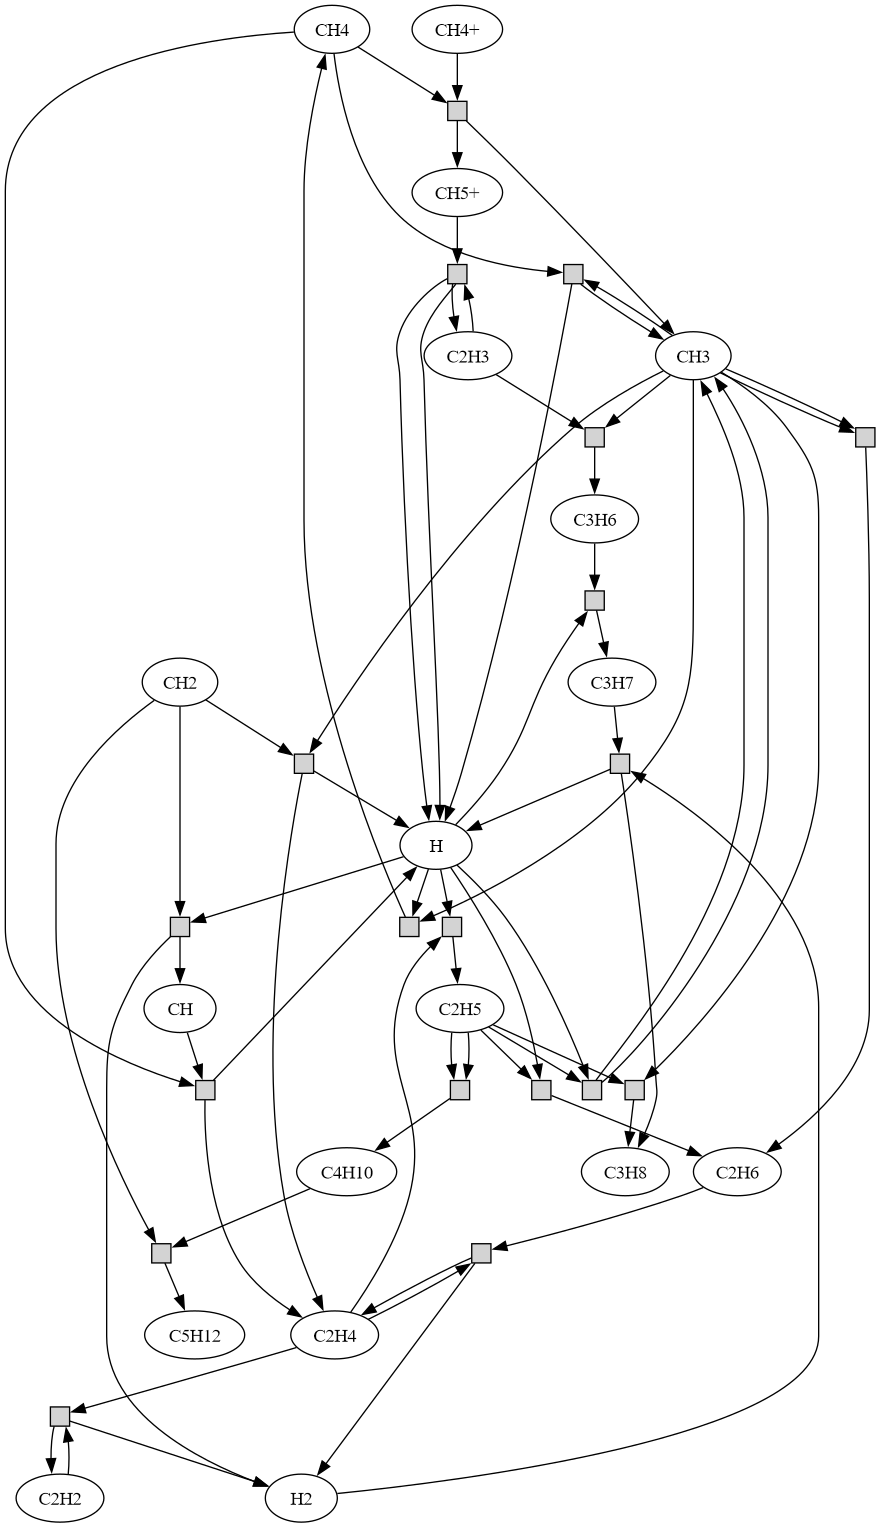

In [10]:
from graphviz import Digraph
from IPython.display import display
from PIL import Image
import io

# 방향 그래프 생성
dot = Digraph(format="png")

# e- 및 M을 제외한 화학 종 리스트
species = [
    "CH4", "CH3", "H", "C2H6", "C2H5", "C2H4", "CH2", "C4H10",
    "C3H8", "C3H7", "C5H12", "CH5+", "CH4+", "C2H3"
]

# 노드 추가 (화학 종)
for s in species:
    dot.node(s, s, shape="ellipse")

# 반응 노드 추가 (작은 크기로 설정)
reactions = [
    ("CH4", "CH3", "Reaction1", ["CH3", "H"]),
    ("CH3", "H", "Reaction2", ["CH4"]),
    ("CH3", "CH3", "Reaction3", ["C2H6"]),
    ("C2H4", "H", "Reaction4", ["C2H5"]),
    ("C2H6", "C2H4", "Reaction5", ["C2H4", "H2"]),
    ("CH", "CH4", "Reaction6", ["C2H4", "H"]),
    ("C2H5", "H", "Reaction7", ["C2H6"]),
    ("C2H5", "C2H5", "Reaction8", ["C4H10"]),
    ("CH2", "H", "Reaction9", ["CH", "H2"]),
    ("CH2", "CH3", "Reaction10", ["C2H4", "H"]),
    ("C2H5", "H", "Reaction11", ["CH3", "CH3"]),
    ("CH4", "CH4+", "Reaction12", ["CH5+", "CH3"]),
    ("CH3", "C2H5", "Reaction13", ["C3H8"]),
    ("CH5+", "C2H3", "Reaction14", ["C2H3", "H", "H"]),
    ("CH3", "C2H3", "Reaction15", ["C3H6"]),
    ("C3H6", "H", "Reaction16", ["C3H7"]),
    ("C4H10", "CH2", "Reaction17", ["C5H12"]),
    ("C3H7", "H2", "Reaction18", ["C3H8", "H"]),
    ("C2H4", "C2H2", "Reaction19", ["C2H2", "H2"])
]

# 반응 노드 추가 및 연결
for reactant1, reactant2, reaction, products in reactions:
    dot.node(reaction, "", shape="box", style="filled", fillcolor="lightgray", width="0.2", height="0.2")  # 반응 노드 크기 줄임
    dot.edge(reactant1, reaction)
    dot.edge(reactant2, reaction)
    for product in products:
        dot.edge(reaction, product)

# 그래프를 메모리에서 렌더링하여 팝업창으로 표시
graph_bytes = dot.pipe(format="png")
image = Image.open(io.BytesIO(graph_bytes))
display(image)